In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.base import OneToOneFeatureMixin
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('./data/preprocess_dataset/dataset_multi-class_3descriptor.csv')
del data['Unnamed: 0']
data = data[data['labels'] != "sheet"]
data = data[data['labels'] != "ribbon"]
data = data[data['labels'] != "tube"]

categories = data["labels"].astype("category").cat
data["labels"] = categories.codes
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler() 

X = scaler.fit_transform(x)

In [3]:
y

0      0
1      3
2      1
3      3
4      2
      ..
832    1
833    2
834    1
835    3
836    3
Name: labels, Length: 792, dtype: int8

In [4]:
col = data.columns[:-1]
print(col)
X=pd.DataFrame(X,columns=col)
data=pd.concat([X,y],axis=1)

Index(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity2',
       'MoranAuto_Hydrophobicity3', 'MoranAuto_Hydrophobicity4',
       'MoranAuto_Hydrophobicity5', 'MoranAuto_Hydrophobicity6',
       'MoranAuto_Hydrophobicity7', 'MoranAuto_Hydrophobicity8',
       'MoranAuto_Hydrophobicity9', 'MoranAuto_Hydrophobicity10',
       ...
       '633', '646', '668', '683', '708', '727', '753', '760', '787', '808'],
      dtype='object', length=1992)


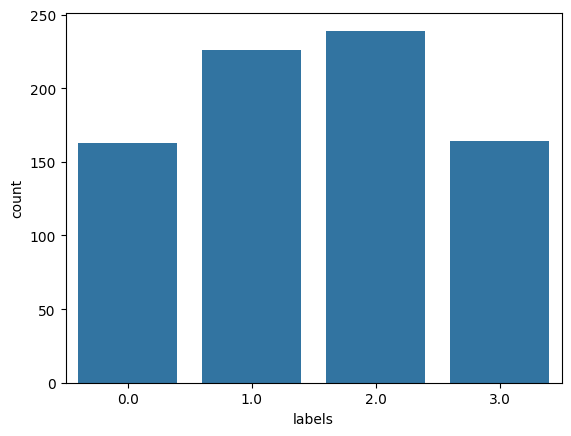

In [5]:
ax = sns.countplot(x='labels',data=data)

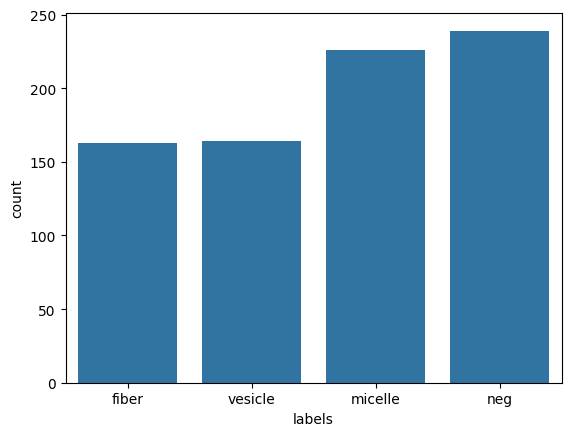

In [6]:
data=pd.read_csv('./data/preprocess_dataset/dataset_multi-class_3descriptor.csv')
del data['Unnamed: 0']
data = data[data['labels'] != "sheet"]
data = data[data['labels'] != "ribbon"]
data = data[data['labels'] != "tube"]
ax = sns.countplot(x='labels',data=data) 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

X_train=pd.DataFrame(X_train,columns=col)
data1=pd.concat([X_train,y_train],axis=1)

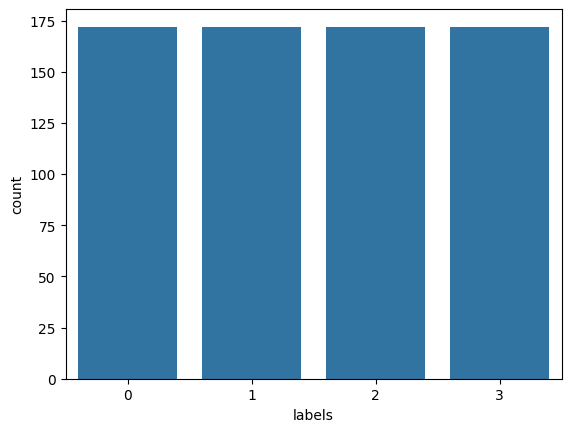

In [8]:
ax = sns.countplot(x='labels',data=data1)    

In [9]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='rbf', C=1000.0, gamma=0.1, random_state=0)
clf = clf.fit(X_train,y_train)

Confusion Matrix:
[[40  1  0  3]
 [14 39  4 11]
 [ 4  0 62  1]
 [ 9 10  8 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72        44
           1       0.78      0.57      0.66        68
           2       0.84      0.93      0.88        67
           3       0.68      0.54      0.60        59

    accuracy                           0.73       238
   macro avg       0.72      0.74      0.72       238
weighted avg       0.74      0.73      0.72       238

Accuracy: 0.726890756302521


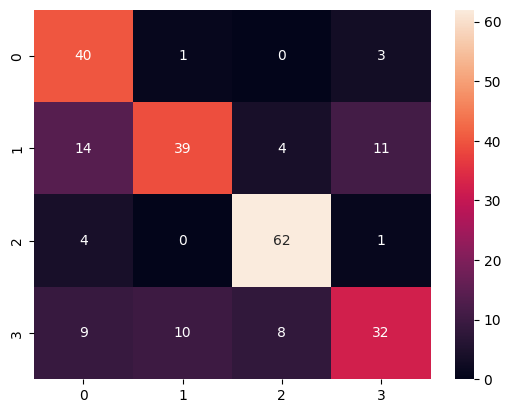

In [10]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[37  6  0  1]
 [12 46  3  7]
 [ 6  2 59  0]
 [ 7 14 10 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        44
           1       0.68      0.68      0.68        68
           2       0.82      0.88      0.85        67
           3       0.78      0.47      0.59        59

    accuracy                           0.71       238
   macro avg       0.72      0.72      0.70       238
weighted avg       0.73      0.71      0.71       238

Accuracy: 0.7142857142857143


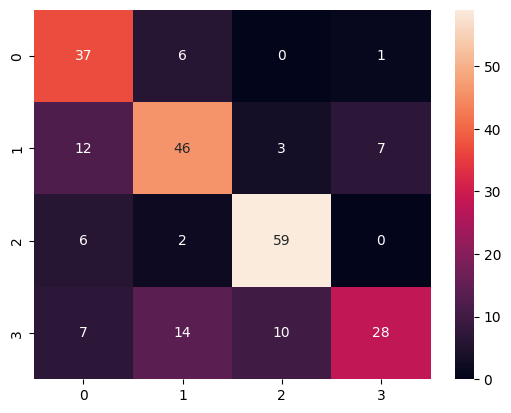

In [11]:
# RandomForest
forest = RandomForestClassifier(n_estimators = 10, random_state=0)      
forest = forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [12]:
#importances = forest.feature_importances_
#indices = importances.argsort()[::-1][:20]
#np.savetxt('importaces.txt',importances[indices],fmt='%f',delimiter=',')

In [13]:
#col[indices]

Confusion Matrix:
[[37  3  1  3]
 [13 41  3 11]
 [ 3  1 57  6]
 [ 4  9 11 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        44
           1       0.76      0.60      0.67        68
           2       0.79      0.85      0.82        67
           3       0.64      0.59      0.61        59

    accuracy                           0.71       238
   macro avg       0.71      0.72      0.71       238
weighted avg       0.72      0.71      0.71       238

Accuracy: 0.7142857142857143


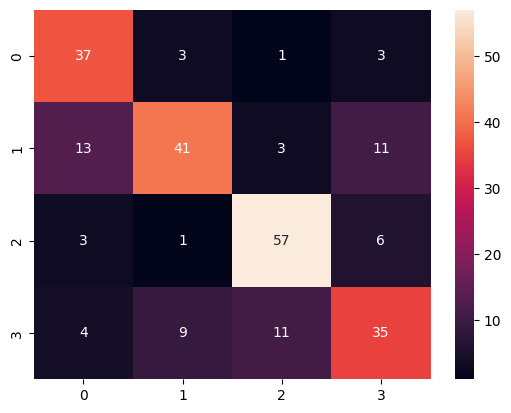

In [14]:
from xgboost import XGBClassifier

clf2 = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5, random_state=0
)
clf2 = clf2.fit(X_train,y_train)
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Nanofiber'),
  Text(0, 1.5, 'Nanomicelle'),
  Text(0, 2.5, 'Unassembly'),
  Text(0, 3.5, 'Nanovesicle')])

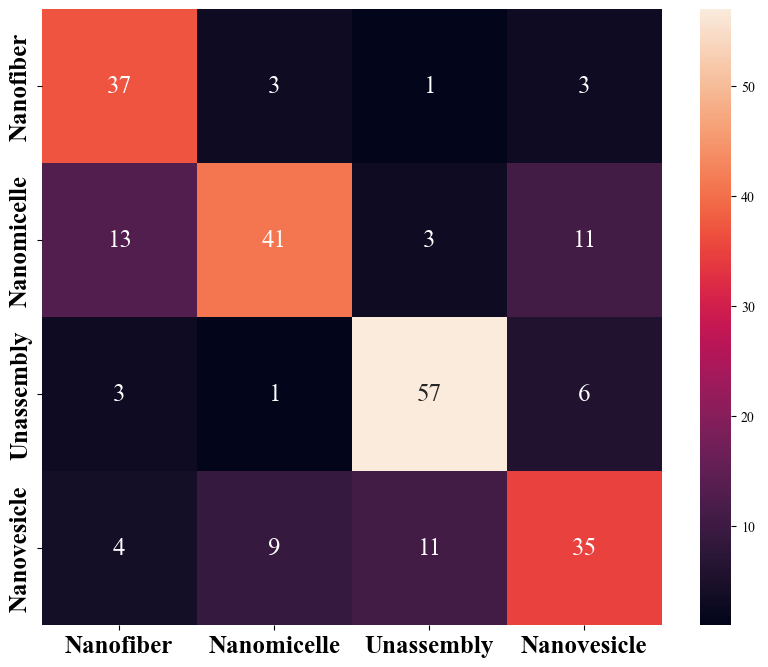

In [15]:
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
df_cm = pd.DataFrame(result, index = ['Nanofiber', 'Nanomicelle', 'Unassembly','Nanovesicle'],
                  columns = ['Nanofiber', 'Nanomicelle', 'Unassembly','Nanovesicle'])
sns.heatmap(df_cm,annot=True,annot_kws={"size": 18}, fmt="d")
plt.rcParams["font.weight"] = "bold"


plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
#plt.savefig('confusion_matrix.tif', dpi=300)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

MLP= MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(2000,50), random_state=0) 
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2000, 50), random_state=0,
              solver='sgd')

Confusion Matrix:
[[37  1  2  4]
 [10 41  9  8]
 [ 4 10 42 11]
 [ 4  8 27 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75        44
           1       0.68      0.60      0.64        68
           2       0.53      0.63      0.57        67
           3       0.47      0.34      0.39        59

    accuracy                           0.59       238
   macro avg       0.59      0.60      0.59       238
weighted avg       0.58      0.59      0.58       238

Accuracy: 0.5882352941176471


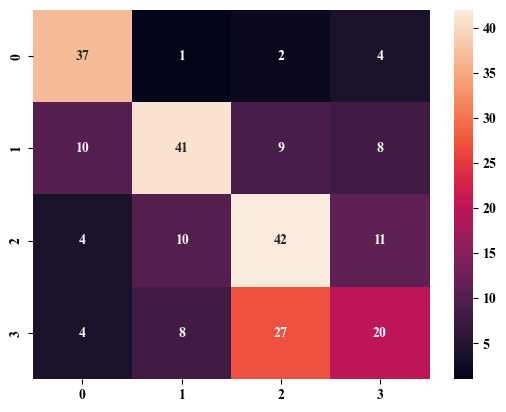

In [17]:
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[30  5  2  7]
 [ 8 45  3 12]
 [ 4  2 57  4]
 [ 8  7  9 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        44
           1       0.76      0.66      0.71        68
           2       0.80      0.85      0.83        67
           3       0.60      0.59      0.60        59

    accuracy                           0.70       238
   macro avg       0.69      0.70      0.69       238
weighted avg       0.70      0.70      0.70       238

Accuracy: 0.7016806722689075


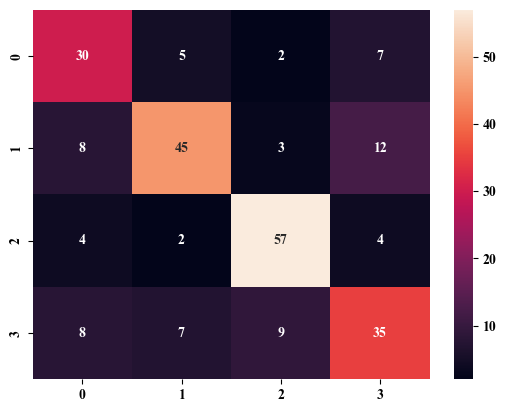

In [18]:
#GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, y_train)
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [19]:
# select 20 features 
k_best = SelectKBest(chi2,k=20).fit(X_train, y_train)
#k_best

selected = k_best.get_support()
selected_features= [col[i] for i, s in enumerate(selected) if s]
scores = [k_best.scores_[i] for i, s in enumerate(selected) if s]

df = pd.DataFrame({'feature': selected_features, 'score': scores})
df = df.sort_values('score', ascending=False)

print(df)

                       feature       score
10                   BCUTpe-1l  114.093036
9                    BCUTse-1l  113.766650
11                  BCUTare-1l  112.975303
7                     BCUTZ-1l  111.391710
8                     BCUTm-1l  110.149477
6                     BCUTd-1l   85.614859
17                          98   77.508733
16                          79   73.978049
13                           8   66.334702
2       GearyAuto_ResidueASA11   59.331961
3           GearyAuto_Steric11   58.208893
14                          60   58.073887
15                          75   55.800950
0   GearyAuto_Hydrophobicity11   55.524268
19                         229   54.886291
1   GearyAuto_Polarizability11   54.297793
12                 GhoseFilter   53.348436
5       GearyAuto_Mutability11   52.694249
4       GearyAuto_Mutability10   52.506206
18                         146   51.468272


Accuracy is:  0.6596638655462185
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        44
           1       0.68      0.66      0.67        68
           2       0.65      0.75      0.69        67
           3       0.61      0.42      0.50        59

    accuracy                           0.66       238
   macro avg       0.66      0.67      0.66       238
weighted avg       0.66      0.66      0.65       238



<Axes: >

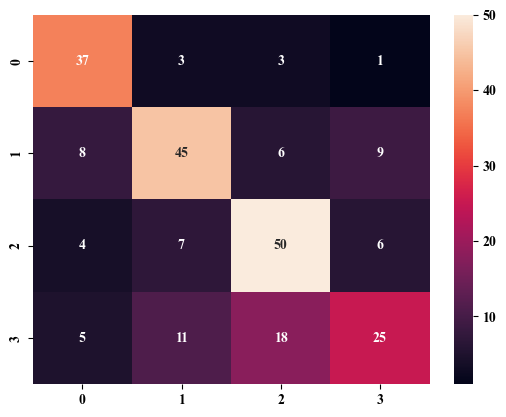

In [20]:
X_2_train=X_train[selected_features]
X_2_test=X_test[selected_features]

clf_rf_2 = RandomForestClassifier(n_estimators = 10, random_state=0)      
clr_rf_2 = clf_rf_2.fit(X_2_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_2_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_2_test))

result1 = classification_report(y_test, clf_rf_2.predict(X_2_test))
print("Classification Report:",)
print (result1)
sns.heatmap(cm_2,annot=True,fmt="d")

In [21]:
#rfe randomforest
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71        44
           1       0.71      0.59      0.65        68
           2       0.81      0.90      0.85        67
           3       0.72      0.61      0.66        59

    accuracy                           0.72       238
   macro avg       0.72      0.73      0.72       238
weighted avg       0.73      0.72      0.72       238

Accuracy: 0.7226890756302521


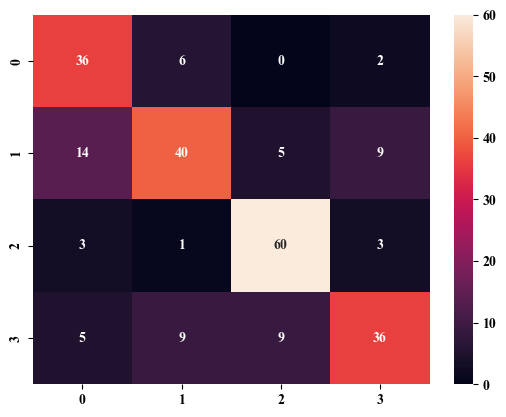

In [22]:
y_train_pred = rfe.predict(X_train)
y_test_pred = rfe.predict(X_test)

cm_2 = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

result1 = classification_report(y_test, rfe.predict(X_test))
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,rfe.predict(X_test))
print("Accuracy:",result2)

In [23]:
#rfecv for randomforest
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5 cross valid
rfecv = rfecv.fit(X_train, y_train)


Confusion Matrix:
[[38  4  0  2]
 [12 47  2  7]
 [ 4  1 61  1]
 [ 5  8  7 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.74        44
           1       0.78      0.69      0.73        68
           2       0.87      0.91      0.89        67
           3       0.80      0.66      0.72        59

    accuracy                           0.78       238
   macro avg       0.77      0.78      0.77       238
weighted avg       0.79      0.78      0.78       238

Accuracy: 0.7773109243697479


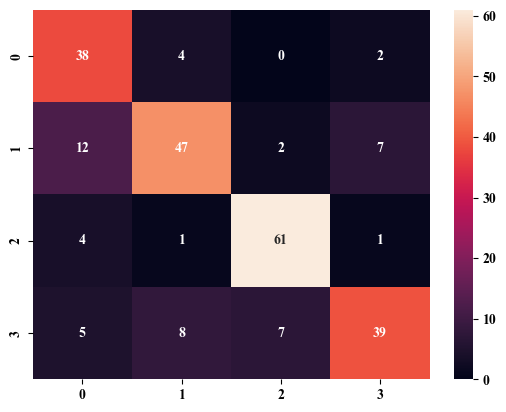

In [33]:
y_train_pred = rfecv.predict(X_train)
y_test_pred = rfecv.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [34]:
np.savetxt('rfecv-mult.txt',result,fmt='%f',delimiter=',')

In [25]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

Optimal number of features : 1819
Best features : Index(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity2',
       'MoranAuto_Hydrophobicity3', 'MoranAuto_Hydrophobicity4',
       'MoranAuto_Hydrophobicity5', 'MoranAuto_Hydrophobicity6',
       'MoranAuto_Hydrophobicity7', 'MoranAuto_Hydrophobicity8',
       'MoranAuto_Hydrophobicity9', 'MoranAuto_Hydrophobicity10',
       ...
       '200', '201', '202', '203', '205', '206', '207', '208', '209', '210'],
      dtype='object', length=1819)


In [26]:
rfecv.get_feature_names_out(col)

array(['MoranAuto_Hydrophobicity1', 'MoranAuto_Hydrophobicity2',
       'MoranAuto_Hydrophobicity3', ..., '208', '209', '210'],
      dtype=object)

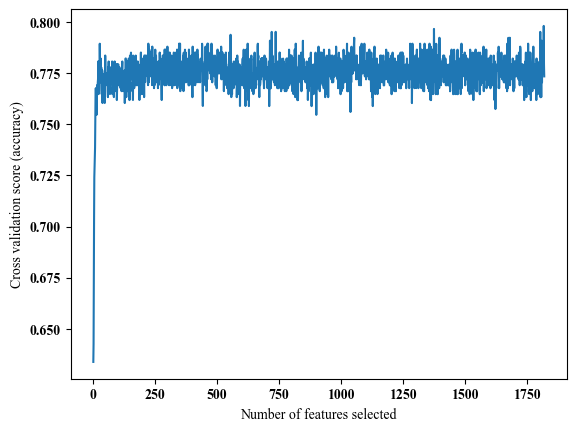

In [31]:

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) -170), rfecv.cv_results_['mean_test_score'][:1821])
plt.show()

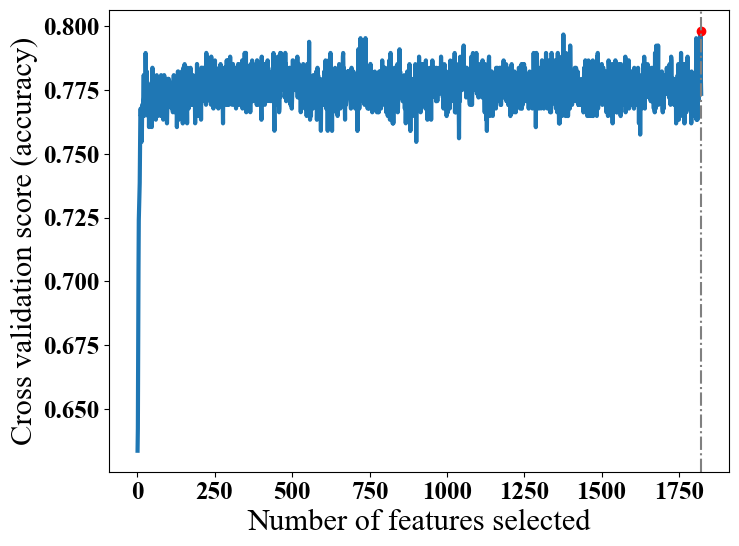

In [32]:

fig = plt.figure(figsize=(8, 6))
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
line_width = 3
font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 22,}
font3 = {'family' : 'Times New Roman','weight' : 'normal','size' : 13,}
plt.xlabel("Number of features selected",font2)
plt.ylabel("Cross validation score (accuracy)",font2)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) -170), rfecv.cv_results_['mean_test_score'][:1821], lw=line_width)

x_max=1819
y_max=rfecv.cv_results_['mean_test_score'][1818]

plt.plot(x_max,y_max, 'ro')


plt.axvline(x=x_max, linestyle='-.', color='grey')
#plt.savefig('rfecv_duo.tif', dpi=300)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
forest.fit(X_train, y_train)

gbdt_pred = clf3.predict(X_test)
xgb_pred = clf2.predict(X_test)
rf_pred = forest.predict(X_test)

ensemble_matrix = np.column_stack((gbdt_pred, xgb_pred, rf_pred))

lr_model = LogisticRegression()
lr_model.fit(ensemble_matrix, y_test)  


final_pred = lr_model.predict(ensemble_matrix)


accuracy = accuracy_score(y_test, final_pred)
print(f'Accuracy: {accuracy}')
